# Starting with data
* How can I import data in Python?
* What is Pandas?
* Why should I use Pandas to work with data?

## Read in the data

In [1]:
import pandas as pd

In [2]:
pd

<module 'pandas' from '/mnt/miniconda/envs/ood/lib/python3.10/site-packages/pandas/__init__.py'>

In [4]:
surveys_df = pd.read_csv("data/surveys.csv") # df = dataframe

In [5]:
type(surveys_df)

pandas.core.frame.DataFrame

In [6]:
surveys_df.dtypes # dtypes is an attribute of a dataframe

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object


#### Challenge - DataFrames

Using our DataFrame `surveys_df`, try out the attributes & methods below to see
what they return.

1. `surveys_df.columns`
2. `surveys_df.shape` Take note of the output of `shape` - what format does it return the shape of the DataFrame in?

HINT: [More on tuples, here][python-datastructures].

3. `surveys_df.head()` Also, what does `surveys_df.head(15)` do?
4. `surveys_df.tail()` Also, what does *'surveysdf.tail'* do

In [18]:
surveys_df.columns # all columns in the dataset s

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [16]:
surveys_df.shape # dimensions of the dataset

(35549, 9)

In [14]:
type(surveys_df.shape)

tuple

In [15]:
surveys_df.head(3) # Shows first 3 rows

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN


In [19]:
surveys_df.tail(2) # shows last two rows

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


## Looking at values inside the data

In [20]:
species = surveys_df['species_id']

In [21]:
species

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

In [22]:
pd.unique(species)

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

#### Challenge - Statistics

1. Create a list of unique site ID's ("plot_id") found in the surveys data. Call it
`site_names`. How many unique sites are there in the data? How many unique
species are in the data?

2. (optional) What is the difference between `len(site_names)` and `surveys_df['plot_id'].nunique()`?


In [23]:
site_names = pd.unique(surveys_df['plot_id'])

In [24]:
site_names

array([ 2,  3,  7,  1,  6,  5,  8,  4, 11, 14, 15, 13,  9, 10, 17, 16, 20,
       23, 18, 21, 22, 19, 12, 24])

In [25]:
len(site_names)

24

In [26]:
len(pd.unique(species))

49

In [28]:
site_names.__len__() # You can ignore this

24

## Groups in Pandas

In [29]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [30]:
surveys_df['weight'].max()

280.0

In [31]:
# group the data by sex
grouped_data = surveys_df.groupby('sex')
                                  

In [32]:
grouped_data.describe()

record_id                                                               \
        count          mean           std  min      25%      50%       75%   
sex                                                                          
F     15690.0  18036.412046  10423.089000  3.0  8917.50  18075.5  27250.00   
M     17348.0  17754.835601  10132.203323  1.0  8969.75  17727.5  26454.25   

                month            ... hindfoot_length         weight  \
         max    count      mean  ...             75%   max    count   
sex                              ...                                  
F    35547.0  15690.0  6.587253  ...            36.0  64.0  15303.0   
M    35548.0  17348.0  6.396184  ...            36.0  58.0  16879.0   

                                                         
          mean        std  min   25%   50%   75%    max  
sex                                                      
F    42.170555  36.847958  4.0  20.0  34.0  46.0  274.0  
M    42.995379  36.184981  4.0  20.0  39.0  49.0  280.0  

[2 rows x 56 columns]

In [33]:
grouped_data.mean()

/tmp/ipykernel_27547/1133710423.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data.mean()


,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.587253,15.880943,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.396184,16.078799,1990.480401,11.098282,29.709578,42.995379


#### Challenge - Summary Data

1. How many recorded individuals are female `F` and how many male `M`?
2. What happens when you group by two columns using the following syntax and
then calculate mean values?
- `grouped_data2 = surveys_df.groupby(['plot_id', 'sex'])`
- `grouped_data2.mean()`
3. Summarize weight values for each site in your data. HINT: you can use the
following syntax to only create summary statistics for one column in your data.
`by_site['weight'].describe()`

In [36]:
surveys_df.groupby('sex')['record_id'].count()

sex
F    15690
M    17348
Name: record_id, dtype: int64

In [37]:
surveys_df['sex'].value_counts()

M    17348
F    15690
Name: sex, dtype: int64

In [38]:
help(surveys_df['sex'].value_counts)

Help on method value_counts in module pandas.core.base:

value_counts(normalize: 'bool' = False, sort: 'bool' = True, ascending: 'bool' = False, bins=None, dropna: 'bool' = True) -> 'Series' method of pandas.core.series.Series instance
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : bool, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : bool, default True
        Sort by frequencies.
    ascending : bool, default False
        Sort in ascending order.
    bins : int, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : bool, default True
        Don't include counts of NaN.
    
  

In [39]:
grouped_data2 = surveys_df.groupby(['plot_id', 'sex'])
grouped_data2.mean()

/tmp/ipykernel_27547/3671429500.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data2.mean()


record_id     month        day         year  hindfoot_length  \
plot_id sex                                                                    
1       F    18390.384434  6.597877  15.338443  1990.933962        31.733911   
        M    17197.740639  6.121461  15.905936  1990.091324        34.302770   
2       F    17714.753608  6.426804  16.288660  1990.449485        30.161220   
        M    18085.458042  6.340035  15.440559  1990.756119        30.353760   
3       F    19888.783875  6.610302  15.993281  1992.013438        23.774044   
        M    20226.767857  6.277381  16.271429  1992.275000        23.833744   
4       F    17489.205275  6.447248  15.608945  1990.235092        33.249102   
        M    18493.841748  6.436893  16.303883  1991.000971        34.097959   
5       F    12280.793169  6.142315  15.722960  1986.485769        28.921844   
        M    12798.426621  6.194539  15.703072  1986.817406        29.694794   
6       F    19406.503392  6.640434  15.947083  1991.579376        26.981322   
        M    17849.574607  6.043194  15.856021  1990.556283        27.425591   
7       F    19069.668657  6.385075  15.313433  1991.441791        19.779553   
        M    19188.729642  6.719870  15.778502  1991.462541        20.536667   
8       F    18920.276190  6.644048  15.479762  1991.267857        32.187578   
        M    19452.109868  6.585961  15.427263  1991.686673        33.751059   
9       F    16217.497069  6.507620  15.309496  1989.303634        35.126092   
        M    18000.710159  6.369522  14.970120  1990.632470        34.175732   
10      F    16001.496454  5.588652  16.964539  1989.248227        18.641791   
        M    15708.704225  5.718310  16.739437  1989.007042        19.567164   
11      F    16994.962287  6.770073  15.954988  1989.836983        32.029299   
        M    16933.909621  6.379981  15.799806  1989.856171        32.078014   
12      F    17457.966981  6.509434  16.305660  1990.266981        30.975124   
        M    17592.327500  6.304167  16.367500  1990.400833        31.762489   
13      F    18033.100318  6.815287  15.847134  1990.619427        27.201014   
        M    16969.044700  6.485313  15.851852  1989.911877        27.893793   
14      F    17097.145275  6.519041  16.427362  1989.974612        32.973373   
        M    17891.948598  6.666355  16.336449  1990.587850        32.961802   
15      F    20602.449064  6.582121  15.787942  1992.523909        21.949891   
        M    18104.019560  6.193154  17.193154  1990.770171        21.803109   
16      F    19002.445946  6.369369  16.549550  1991.351351        23.144928   
        M    18434.714286  6.208791  16.402930  1990.926740        23.480916   
17      F    18234.322870  6.650224  15.892377  1990.785874        30.918536   
        M    18857.651472  6.569801  16.183286  1991.331434        32.227634   
18      F    17940.875497  6.698013  15.960265  1990.536424        26.690341   
        M    15106.718850  6.610224  16.797125  1988.551118        27.703072   
19      F    21848.216475  6.701149  15.226054  1993.417625        21.257937   
        M    19470.779690  6.533563  16.647160  1991.740103        21.071685   
20      F    17510.769231  6.743077  16.026154  1990.253846        27.069193   
        M    16076.192496  6.489396  16.375204  1989.243067        27.908451   
21      F    22452.636661  6.860884  16.307692  1993.878887        22.366554   
        M    20120.399113  6.671840  16.203991  1992.199557        21.736721   
22      F    18499.695976  6.651267  15.521610  1990.973174        34.108320   
        M    18015.365527  6.381872  16.682021  1990.650817        33.359746   
23      F    15863.193939  6.860606  16.036364  1989.024242        20.051948   
        M    17091.338164  6.391304  16.077295  1989.961353        19.850000   
24      F    13702.224280  6.596708  16.393004  1987.485597        26.993377   
        M    15208.136082  6.360825  16.971134  1988.641237        25.786996   

               

## Plotting (quick and dirty)

In [40]:
# tell jupyter to show figures inline
%matplotlib inline

In [43]:
# Create a quick bar chart
species_counts = surveys_df.groupby('species_id')['record_id'].count()
species_counts = surveys_df['species_id'].value_counts()

In [44]:
species_counts

DM    10596
PP     3123
DO     3027
PB     2891
RM     2609
DS     2504
OT     2249
PF     1597
PE     1299
NL     1252
OL     1006
PM      899
AH      437
AB      303
SS      248
SH      147
SA       75
RF       75
CB       50
BA       46
SO       43
SF       43
DX       40
PC       39
PL       36
PH       32
CQ       16
CM       13
OX       12
UR       10
PI        9
UP        8
PG        8
RO        8
PX        6
SU        5
PU        5
US        4
UL        4
AS        2
RX        2
ZL        2
ST        1
CU        1
SC        1
CS        1
CT        1
CV        1
Name: species_id, dtype: int64

<AxesSubplot: >

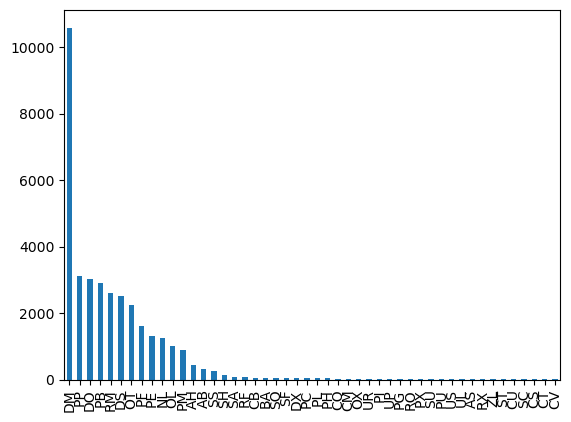

In [45]:
species_counts.plot(kind='bar')

#### Challenge - Plots

1. Create a plot of average weight across all species per site.
2. Create a plot of total males versus total females for the entire dataset.

In [46]:
grouped_data = surveys_df.groupby('plot_id')

In [47]:
average_weight_per_plot = grouped_data['weight'].mean()

<AxesSubplot: xlabel='plot_id'>

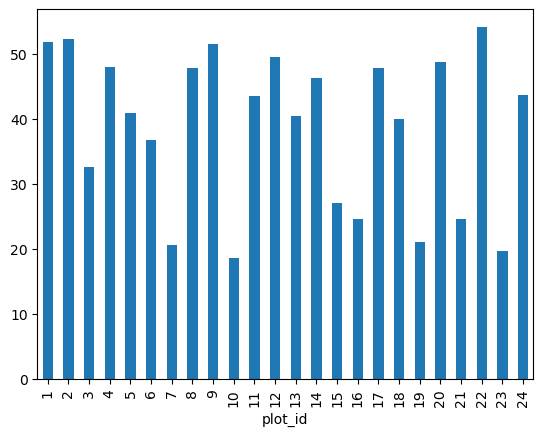

In [48]:
average_weight_per_plot.plot(kind='bar')

In [49]:
sex_counts = surveys_df['sex'].value_counts()

<AxesSubplot: >

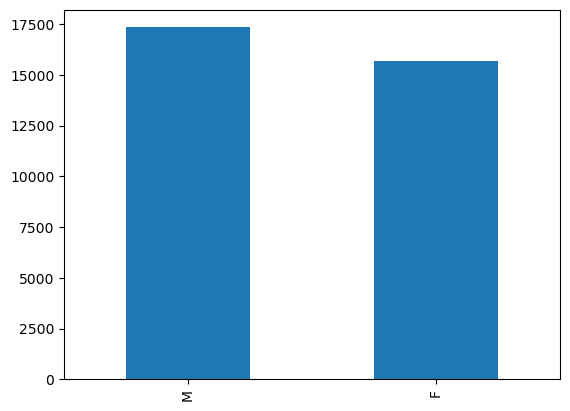

In [50]:
sex_counts.plot(kind='bar')